# Beans Multiclass Data Analysis
This notebook analyzes the beans multiclass dataset. We'll start by importing the necessary libraries and exploring the data structure.
All configurations (like area, shape and roundness) of data were gathered through camera-based systems using computer vision algorithms—a method commonly used in modern agricultural quality control setups.
Attribute Information:
1.	Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.	Perimeter (P): Bean circumference is defined as the length of its border.
3.	Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.	Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.	Aspect ratio (K): Defines the relationship between L and l.
6.	Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.	Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.	Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.	Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.	Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.	Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.	Compactness (CO): Measures the roundness of an object: Ed/L
13.	ShapeFactor1 (SF1)
14.	ShapeFactor2 (SF2)
15.	ShapeFactor3 (SF3)
16.	ShapeFactor4 (SF4)
17.	Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) 


## 1. Import Essential Libraries
First, we'll import the required libraries for data analysis and visualization.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using the correct style name
sns.set_palette('husl')

In [ ]:
# Load the dataset
df = pd.read_csv('dry_bean_dataset.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

## 3. Display Basic Dataset Information
Let's examine the dataset structure including data types and non-null counts.

In [ ]:
# Display dataset information
print("\nDataset Information:")
display(df.info())

In [ ]:
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\n" + "=" * 80)
print("FIRST FEW ROWS")
print("=" * 80)
print(df.head())

print("\n" + "=" * 80)
print("DATA TYPES AND MISSING VALUES")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("MISSING VALUES COUNT")
print("=" * 80)
print(df.isnull().sum())

print("\n" + "=" * 80)
print("BASIC STATISTICS")
print("=" * 80)
print(df.describe())

In [ ]:

print("\n" + "=" * 80)
print("CLASS DISTRIBUTION")
print("=" * 80)

class_counts = df['Class'].value_counts()
print("\nSample counts per class:")
print(class_counts)

print("\nPercentage distribution:")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=sns.color_palette("husl", len(class_counts)))
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Bean Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(class_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("husl", len(class_counts)), startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

print(f"\nClass Imbalance Analysis:")
print(f"Most frequent class: {class_counts.idxmax()} with {max_class} samples")
print(f"Least frequent class: {class_counts.idxmin()} with {min_class} samples")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 2:
    print("WARNING: Significant class imbalance detected!")
else:
    print("Classes are relatively balanced")

In [ ]:

print("\n" + "=" * 80)
print("FEATURE DISTRIBUTIONS")
print("=" * 80)

# Get all numeric columns (excluding Class)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Create histograms for all features
n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[feature].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].legend()

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 80)
print("OUTLIER DETECTION - BOX PLOTS")
print("=" * 80)

# Box plots for all features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].boxplot(df[feature].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Box plots by class for selected features
selected_features = ['Area', 'Perimeter', 'MajorAxisLength', 'Eccentricity', 'roundness', 'Compactness']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(selected_features):
    df.boxplot(column=feature, by='Class', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{feature} by Class', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Bean Class')
    axes[idx].set_ylabel(feature)
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

plt.suptitle('Feature Distributions by Bean Class', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

print("\nTop 10 Positive Correlations:")
# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
# Find pairs with highest correlation
corr_pairs = upper_tri.unstack().sort_values(ascending=False)
print(corr_pairs.head(10))

print("\nTop 10 Negative Correlations:")
print(corr_pairs.tail(10))

# Full correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Focused correlation heatmap (top features)
top_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'roundness', 'Compactness']
if all(f in df.columns for f in top_features):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1)
    plt.title('Correlation Heatmap - Key Features', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()

In [ ]:

print("\n" + "=" * 80)
print("MULTIVARIATE RELATIONSHIPS - PAIRPLOT")
print("=" * 80)

# Select subset of features for pairplot (to avoid overcrowding)
pairplot_features = ['Area', 'Perimeter', 'Eccentricity', 'roundness', 'Compactness', 'Class']

if all(f in df.columns for f in pairplot_features):
    print(f"\nGenerating pairplot for features: {pairplot_features[:-1]}")
    
    # Sample data if dataset is too large
    sample_size = min(1000, len(df))
    df_sample = df[pairplot_features].sample(n=sample_size, random_state=42)
    
    pairplot = sns.pairplot(df_sample, hue='Class', palette='husl', 
                           diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30},
                           height=2.5)
    pairplot.fig.suptitle('Pairplot - Feature Relationships by Bean Class', 
                         fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

In [ ]:

print("\n" + "=" * 80)
print("KEY FEATURE RELATIONSHIPS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Area vs Perimeter
for class_name in df['Class'].unique():
    class_data = df[df['Class'] == class_name]
    axes[0, 0].scatter(class_data['Area'], class_data['Perimeter'], 
                      label=class_name, alpha=0.6, s=30)
axes[0, 0].set_xlabel('Area', fontsize=12)
axes[0, 0].set_ylabel('Perimeter', fontsize=12)
axes[0, 0].set_title('Area vs Perimeter', fontsize=13, fontweight='bold')
axes[0, 0].legend(loc='best', fontsize=9)
axes[0, 0].grid(alpha=0.3)

# Plot 2: Eccentricity vs Roundness
for class_name in df['Class'].unique():
    class_data = df[df['Class'] == class_name]
    axes[0, 1].scatter(class_data['Eccentricity'], class_data['roundness'], 
                      label=class_name, alpha=0.6, s=30)
axes[0, 1].set_xlabel('Eccentricity', fontsize=12)
axes[0, 1].set_ylabel('Roundness', fontsize=12)
axes[0, 1].set_title('Eccentricity vs Roundness', fontsize=13, fontweight='bold')
axes[0, 1].legend(loc='best', fontsize=9)
axes[0, 1].grid(alpha=0.3)

# Plot 3: MajorAxisLength vs MinorAxisLength
for class_name in df['Class'].unique():
    class_data = df[df['Class'] == class_name]
    axes[1, 0].scatter(class_data['MajorAxisLength'], class_data['MinorAxisLength'], 
                      label=class_name, alpha=0.6, s=30)
axes[1, 0].set_xlabel('Major Axis Length', fontsize=12)
axes[1, 0].set_ylabel('Minor Axis Length', fontsize=12)
axes[1, 0].set_title('Major vs Minor Axis Length', fontsize=13, fontweight='bold')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(alpha=0.3)

# Plot 4: Compactness vs Solidity
for class_name in df['Class'].unique():
    class_data = df[df['Class'] == class_name]
    axes[1, 1].scatter(class_data['Compactness'], class_data['Solidity'], 
                      label=class_name, alpha=0.6, s=30)
axes[1, 1].set_xlabel('Compactness', fontsize=12)
axes[1, 1].set_ylabel('Solidity', fontsize=12)
axes[1, 1].set_title('Compactness vs Solidity', fontsize=13, fontweight='bold')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Key Feature Relationships by Bean Class', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY BY CLASS")
print("=" * 80)

for class_name in sorted(df['Class'].unique()):
    print(f"\n{'=' * 80}")
    print(f"Class: {class_name}")
    print(f"{'=' * 80}")
    class_data = df[df['Class'] == class_name]
    print(class_data[numeric_features].describe())

# ====================================================================================
# 9. KEY FINDINGS SUMMARY
# ====================================================================================

print("\n" + "=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

# Find highly correlated features
high_corr_threshold = 0.9
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print("\n1. HIGHLY CORRELATED FEATURES (|r| > 0.9):")
if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   - {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("   - No feature pairs with correlation > 0.9")

print("\n2. CLASS BALANCE:")
print(f"   - Total Classes: {df['Class'].nunique()}")
print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("   - WARNING: Significant imbalance - consider resampling techniques")

print("\n3. FEATURE CHARACTERISTICS:")
print(f"   - Total Features: {len(numeric_features)}")
print(f"   - Features with high variance: ", end="")
variance_threshold = df[numeric_features].var().quantile(0.75)
high_var_features = df[numeric_features].var()[df[numeric_features].var() > variance_threshold].index.tolist()
print(', '.join(high_var_features[:5]))

print("\n4. SEPARABILITY:")
print("   - Bean classes show distinct clusters in the feature space")
print("   - Area and Perimeter show strong class separation")
print("   - Shape factors (Roundness, Eccentricity) provide complementary information")

print("\n5. RECOMMENDATIONS:")
print("   - Consider feature scaling/normalization before modeling")
print("   - Remove highly correlated features to reduce dimensionality")
print("   - Use stratified sampling for train-test split due to class imbalance")
print("   - Shape features (Roundness, Eccentricity, Compactness) are key discriminators")

print("\n" + "=" * 80)
print("EDA COMPLETED")
print("=" * 80)

In [ ]:

print("\n" + "=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Count missing values
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create missing values summary
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with Missing Values:")
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot of missing counts
    axes[0].barh(missing_df['Column'], missing_df['Missing_Count'], color='coral')
    axes[0].set_xlabel('Number of Missing Values', fontsize=12)
    axes[0].set_title('Missing Values Count by Feature', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Bar plot of missing percentages
    axes[1].barh(missing_df['Column'], missing_df['Missing_Percentage'], color='salmon')
    axes[1].set_xlabel('Percentage of Missing Values (%)', fontsize=12)
    axes[1].set_title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap of missing values
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap (Yellow = Missing)', fontsize=14, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Samples')
    plt.tight_layout()
    plt.show()
    
else:
    print("\nNo missing values found in the dataset!")

In [ ]:

print("\n" + "=" * 80)
print("MISSING VALUES TREATMENT")
print("=" * 80)

# Create a copy for treatment
df_cleaned = df.copy()

if len(missing_df) > 0:
    print("\nApplying missing value treatment strategies...")
    
    # Get numeric columns only
    numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
    
    for col in missing_df['Column']:
        if col in numeric_cols:
            missing_count = df_cleaned[col].isnull().sum()
            missing_pct = (missing_count / len(df_cleaned)) * 100
            
            if missing_pct < 5:
                # For less than 5% missing: use median imputation
                median_value = df_cleaned[col].median()
                df_cleaned[col].fillna(median_value, inplace=True)
                print(f"  - {col}: Imputed {missing_count} values with median ({median_value:.2f})")
            
            elif missing_pct < 15:
                # For 5-15% missing: use mean imputation
                mean_value = df_cleaned[col].mean()
                df_cleaned[col].fillna(mean_value, inplace=True)
                print(f"  - {col}: Imputed {missing_count} values with mean ({mean_value:.2f})")
            
            else:
                # For more than 15% missing: consider dropping or advanced imputation
                print(f"  - {col}: WARNING - High missing percentage ({missing_pct:.2f}%). Consider dropping.")
        else:
            # For categorical columns: use mode imputation
            mode_value = df_cleaned[col].mode()[0]
            missing_count = df_cleaned[col].isnull().sum()
            df_cleaned[col].fillna(mode_value, inplace=True)
            print(f"  - {col}: Imputed {missing_count} values with mode ({mode_value})")
    
    print(f"\nMissing values after treatment: {df_cleaned.isnull().sum().sum()}")
else:
    print("\nNo missing values to treat!")

In [ ]:

print("\n" + "=" * 80)
print("OUTLIER DETECTION - VISUALIZATION")
print("=" * 80)

# Get numeric features
numeric_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Create box plots for all features
n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    bp = axes[idx].boxplot(df_cleaned[feature].dropna(), vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots - Outlier Detection (Red dots = Outliers)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 80)
print("OUTLIER DETECTION - IQR METHOD")
print("=" * 80)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound, len(outliers)

# Detect outliers for each numeric feature
outlier_summary_iqr = []

print("\nOutliers detected using IQR method (1.5 * IQR):")
print("-" * 80)

for feature in numeric_features:
    outliers, lower, upper, count = detect_outliers_iqr(df_cleaned, feature)
    outlier_pct = (count / len(df_cleaned)) * 100
    
    outlier_summary_iqr.append({
        'Feature': feature,
        'Outlier_Count': count,
        'Outlier_Percentage': outlier_pct,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })
    
    if count > 0:
        print(f"{feature:20s}: {count:5d} outliers ({outlier_pct:5.2f}%) | Bounds: [{lower:.2f}, {upper:.2f}]")

# Create DataFrame for visualization
outlier_df_iqr = pd.DataFrame(outlier_summary_iqr)
outlier_df_iqr = outlier_df_iqr[outlier_df_iqr['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)

if len(outlier_df_iqr) > 0:
    # Visualize outlier counts
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].barh(outlier_df_iqr['Feature'], outlier_df_iqr['Outlier_Count'], color='indianred')
    axes[0].set_xlabel('Number of Outliers', fontsize=12)
    axes[0].set_title('Outlier Count by Feature (IQR Method)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    axes[1].barh(outlier_df_iqr['Feature'], outlier_df_iqr['Outlier_Percentage'], color='lightcoral')
    axes[1].set_xlabel('Percentage of Outliers (%)', fontsize=12)
    axes[1].set_title('Outlier Percentage by Feature (IQR Method)', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:

print("\n" + "=" * 80)
print("OUTLIER DETECTION - Z-SCORE METHOD")
print("=" * 80)

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    
    return len(outlier_indices), outlier_indices

# Detect outliers for each numeric feature using Z-score
outlier_summary_zscore = []

print(f"\nOutliers detected using Z-score method (threshold = 3):")
print("-" * 80)

for feature in numeric_features:
    count, indices = detect_outliers_zscore(df_cleaned, feature)
    outlier_pct = (count / len(df_cleaned)) * 100
    
    outlier_summary_zscore.append({
        'Feature': feature,
        'Outlier_Count': count,
        'Outlier_Percentage': outlier_pct
    })
    
    if count > 0:
        print(f"{feature:20s}: {count:5d} outliers ({outlier_pct:5.2f}%)")

# Create DataFrame for visualization
outlier_df_zscore = pd.DataFrame(outlier_summary_zscore)
outlier_df_zscore = outlier_df_zscore[outlier_df_zscore['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)

# Compare IQR vs Z-score methods
print("\n" + "=" * 80)
print("COMPARISON: IQR vs Z-SCORE METHODS")
print("=" * 80)

comparison_df = pd.merge(
    outlier_df_iqr[['Feature', 'Outlier_Count']].rename(columns={'Outlier_Count': 'IQR_Count'}),
    outlier_df_zscore[['Feature', 'Outlier_Count']].rename(columns={'Outlier_Count': 'ZScore_Count'}),
    on='Feature',
    how='outer'
).fillna(0)

print("\n", comparison_df.to_string(index=False))

# Visualize comparison
if len(comparison_df) > 0:
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(comparison_df))
    width = 0.35
    
    ax.bar(x - width/2, comparison_df['IQR_Count'], width, label='IQR Method', color='indianred', alpha=0.8)
    ax.bar(x + width/2, comparison_df['ZScore_Count'], width, label='Z-Score Method', color='steelblue', alpha=0.8)
    
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Number of Outliers', fontsize=12)
    ax.set_title('Outlier Detection: IQR vs Z-Score Methods', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Feature'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:

print("\n" + "=" * 80)
print("OUTLIER TREATMENT")
print("=" * 80)

# Create copies for different treatment strategies
df_capped = df_cleaned.copy()
df_removed = df_cleaned.copy()
df_transformed = df_cleaned.copy()

print("\n--- Strategy 1: Capping (Winsorization) using IQR ---")
print("Replace outliers with boundary values")

for feature in numeric_features:
    Q1 = df_capped[feature].quantile(0.25)
    Q3 = df_capped[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers_before = ((df_capped[feature] < lower_bound) | (df_capped[feature] > upper_bound)).sum()
    
    # Cap the outliers
    df_capped[feature] = np.where(df_capped[feature] < lower_bound, lower_bound, df_capped[feature])
    df_capped[feature] = np.where(df_capped[feature] > upper_bound, upper_bound, df_capped[feature])
    
    if outliers_before > 0:
        print(f"  {feature:20s}: {outliers_before} outliers capped")

print(f"\nDataset shape after capping: {df_capped.shape}")

print("\n--- Strategy 2: Removal ---")
print("Remove rows containing outliers (use with caution)")

# Identify rows with outliers using IQR
outlier_mask = pd.Series([False] * len(df_removed))

for feature in numeric_features:
    Q1 = df_removed[feature].quantile(0.25)
    Q3 = df_removed[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    feature_outliers = (df_removed[feature] < lower_bound) | (df_removed[feature] > upper_bound)
    outlier_mask = outlier_mask | feature_outliers

rows_with_outliers = outlier_mask.sum()
df_removed = df_removed[~outlier_mask]

print(f"  Rows with outliers: {rows_with_outliers}")
print(f"  Rows removed: {rows_with_outliers}")
print(f"  Dataset shape after removal: {df_removed.shape}")
print(f"  Data retention: {(len(df_removed) / len(df_cleaned)) * 100:.2f}%")

print("\n--- Strategy 3: Transformation (Log Transform) ---")
print("Apply log transformation to reduce impact of outliers")

for feature in numeric_features:
    if (df_transformed[feature] > 0).all():  # Only if all values are positive
        original_outliers = detect_outliers_iqr(df_transformed, feature)[3]
        
        # Apply log transformation
        df_transformed[f'{feature}_log'] = np.log1p(df_transformed[feature])
        
        new_outliers = detect_outliers_iqr(df_transformed, f'{feature}_log')[3]
        
        if original_outliers > 0:
            reduction = ((original_outliers - new_outliers) / original_outliers) * 100
            print(f"  {feature:20s}: {original_outliers} -> {new_outliers} outliers ({reduction:.1f}% reduction)")

print(f"\nDataset shape after transformation: {df_transformed.shape}")

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZING TREATMENT EFFECTS")
print("=" * 80)

# Select a feature with outliers for comparison
if len(outlier_df_iqr) > 0:
    feature_to_compare = outlier_df_iqr.iloc[0]['Feature']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Original
    axes[0, 0].boxplot(df_cleaned[feature_to_compare].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[0, 0].set_title(f'Original: {feature_to_compare}', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Value')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Capped
    axes[0, 1].boxplot(df_capped[feature_to_compare].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[0, 1].set_title(f'After Capping: {feature_to_compare}', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Value')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Removed
    axes[1, 0].boxplot(df_removed[feature_to_compare].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightyellow', alpha=0.7))
    axes[1, 0].set_title(f'After Removal: {feature_to_compare}', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Transformed
    if f'{feature_to_compare}_log' in df_transformed.columns:
        axes[1, 1].boxplot(df_transformed[f'{feature_to_compare}_log'].dropna(), vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightcoral', alpha=0.7))
        axes[1, 1].set_title(f'After Log Transform: {feature_to_compare}', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Log Value')
        axes[1, 1].grid(axis='y', alpha=0.3)
    else:
        axes[1, 1].axis('off')
    
    plt.suptitle('Comparison of Outlier Treatment Methods', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:

print("\n" + "=" * 80)
print("RECOMMENDATIONS")
print("=" * 80)

print("\n1. MISSING VALUES:")
if len(missing_df) > 0:
    print("   - Missing values detected and treated using appropriate imputation")
    print("   - Median imputation used for < 5% missing")
    print("   - Mean imputation used for 5-15% missing")
else:
    print("   - No missing values detected - dataset is complete")

print("\n2. OUTLIERS:")
total_outliers_iqr = outlier_df_iqr['Outlier_Count'].sum() if len(outlier_df_iqr) > 0 else 0
total_outliers_zscore = outlier_df_zscore['Outlier_Count'].sum() if len(outlier_df_zscore) > 0 else 0

print(f"   - IQR Method: {total_outliers_iqr} total outlier instances detected")
print(f"   - Z-Score Method: {total_outliers_zscore} total outlier instances detected")

print("\n3. TREATMENT STRATEGY SELECTION:")
print("   - Capping (Recommended): Preserves all data, reduces extreme values")
print("     * Best for: Maintaining sample size, robust to measurement errors")
print("     * Use when: You have limited data or outliers might be valid extreme values")
print("")
print("   - Removal: Eliminates outlier rows completely")
print(f"     * Data retention: {(len(df_removed) / len(df_cleaned)) * 100:.2f}%")
print("     * Use when: Outliers are clearly errors and you have sufficient data")
print("")
print("   - Transformation: Reduces skewness and outlier impact")
print("     * Use when: Data is heavily skewed or for certain ML algorithms")

print("\n4. FINAL RECOMMENDATION:")
if rows_with_outliers / len(df_cleaned) < 0.05:
    print("   - Outliers affect < 5% of data: Consider REMOVAL")
elif rows_with_outliers / len(df_cleaned) < 0.15:
    print("   - Outliers affect 5-15% of data: Consider CAPPING")
else:
    print("   - Outliers affect > 15% of data: Consider TRANSFORMATION or domain expertise")

print("\n" + "=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("EXPORT CLEANED DATA")
print("=" * 80)

# Save different versions
df_capped.to_csv('bean_dataset_capped.csv', index=False)
print("  Saved: bean_dataset_capped.csv")

df_removed.to_csv('bean_dataset_removed.csv', index=False)
print("  Saved: bean_dataset_removed.csv")

# Save original with basic cleaning (no outlier treatment)
df_cleaned.to_csv('bean_dataset_cleaned.csv', index=False)
print("  Saved: bean_dataset_cleaned.csv")

print("\nCleaning process completed successfully!")
print("=" * 80)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

print("\n" + "=" * 80)
print("SKEWNESS ANALYSIS")
print("=" * 80)

# Calculate skewness for all numeric features 
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
skewness_dict = {}

print("\nSkewness values for each feature:")
print("-" * 80)
print(f"{'Feature':<25} {'Skewness':<12} {'Kurtosis':<12} {'Assessment':<20}")
print("-" * 80)

for feature in numeric_features:
    skew_val = skew(X[feature].dropna())
    kurt_val = kurtosis(X[feature].dropna())
    skewness_dict[feature] = skew_val
    
    # Classify skewness
    if abs(skew_val) < 0.5:
        assessment = "Symmetric"
    elif abs(skew_val) < 1:
        assessment = "Moderately Skewed"
    else:
        assessment = "Highly Skewed"
    
    print(f"{feature:<25} {skew_val:>10.3f}   {kurt_val:>10.3f}   {assessment:<20}")

# Visualize skewness
skewness_df = pd.DataFrame(list(skewness_dict.items()), columns=['Feature', 'Skewness'])
skewness_df = skewness_df.sort_values('Skewness', key=abs, ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of skewness
colors = ['red' if abs(x) > 1 else 'orange' if abs(x) > 0.5 else 'green' 
          for x in skewness_df['Skewness']]
axes[0].barh(skewness_df['Feature'], skewness_df['Skewness'], color=colors, alpha=0.7)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].axvline(x=-1, color='red', linestyle=':', linewidth=1, alpha=0.5, label='Threshold')
axes[0].axvline(x=1, color='red', linestyle=':', linewidth=1, alpha=0.5)
axes[0].set_xlabel('Skewness Value', fontsize=12)
axes[0].set_title('Feature Skewness Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Distribution plots for most skewed features
highly_skewed = skewness_df[abs(skewness_df['Skewness']) > 1]['Feature'].tolist()[:4]
if len(highly_skewed) > 0:
    axes[1].text(0.5, 0.5, f"Highly Skewed Features:\n\n" + "\n".join(highly_skewed), 
                ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[1].set_title('Features Requiring Transformation', fontsize=14, fontweight='bold')
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, "No highly skewed features detected!", 
                ha='center', va='center', fontsize=14, color='green', fontweight='bold')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

# Visualize distributions of highly skewed features
if len(highly_skewed) > 0:
    n_plots = len(highly_skewed)
    n_cols = min(2, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, feature in enumerate(highly_skewed):
        axes[idx].hist(X[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature} (Skewness: {skewness_dict[feature]:.2f})', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Highly Skewed Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n" + "=" * 80)
print("SKEWNESS TREATMENT")
print("=" * 80)

# Create a copy for transformation
X_transformed = X.copy()

# Apply transformations to highly skewed features
print("\nApplying transformations to highly skewed features (|skewness| > 1):")
print("-" * 80)

transformation_summary = []

for feature in numeric_features:
    original_skew = skew(X[feature].dropna())
    
    if abs(original_skew) > 1:
        # Try different transformations
        if (X[feature] > 0).all():
            # Log transformation (for positive values)
            X_transformed[feature] = np.log1p(X[feature])
            new_skew = skew(X_transformed[feature].dropna())
            transformation_type = "Log Transform"
            
            # If still highly skewed, try square root
            if abs(new_skew) > abs(original_skew):
                X_transformed[feature] = np.sqrt(X[feature])
                new_skew = skew(X_transformed[feature].dropna())
                transformation_type = "Square Root"
            
            # If still highly skewed, try Box-Cox
            if abs(new_skew) > 1:
                try:
                    X_transformed[feature], _ = stats.boxcox(X[feature] + 1)
                    new_skew = skew(X_transformed[feature].dropna())
                    transformation_type = "Box-Cox"
                except:
                    pass
        else:
            # Yeo-Johnson for data with negative values
            try:
                X_transformed[feature], _ = stats.yeojohnson(X[feature])
                new_skew = skew(X_transformed[feature].dropna())
                transformation_type = "Yeo-Johnson"
            except:
                new_skew = original_skew
                transformation_type = "None (Failed)"
        
        improvement = ((abs(original_skew) - abs(new_skew)) / abs(original_skew)) * 100
        
        transformation_summary.append({
            'Feature': feature,
            'Original_Skew': original_skew,
            'New_Skew': new_skew,
            'Transformation': transformation_type,
            'Improvement': improvement
        })
        
        print(f"{feature:<25} {original_skew:>7.3f} -> {new_skew:>7.3f} ({transformation_type}) | {improvement:>5.1f}% improvement")

# Visualize before and after transformation
if len(transformation_summary) > 0:
    comparison_features = [t['Feature'] for t in transformation_summary[:4]]
    
    fig, axes = plt.subplots(len(comparison_features), 2, figsize=(14, len(comparison_features) * 3))
    if len(comparison_features) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, feature in enumerate(comparison_features):
        # Original distribution
        axes[idx, 0].hist(X[feature], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'Original: {feature} (Skew: {skew(X[feature]):.2f})', 
                              fontsize=11, fontweight='bold')
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].grid(axis='y', alpha=0.3)
        
        # Transformed distribution
        axes[idx, 1].hist(X_transformed[feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        axes[idx, 1].set_title(f'Transformed: {feature} (Skew: {skew(X_transformed[feature]):.2f})', 
                              fontsize=11, fontweight='bold')
        axes[idx, 1].set_ylabel('Frequency')
        axes[idx, 1].grid(axis='y', alpha=0.3)
    
    plt.suptitle('Before vs After Skewness Treatment', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n" + "=" * 80)
print("CATEGORICAL VARIABLE ENCODING")
print("=" * 80)

# Encode target variable (Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nTarget Variable Encoding:")
print("-" * 80)
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded values: {np.unique(y_encoded)}")

# Create encoding mapping
encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nEncoding Mapping:")
for original, encoded in encoding_map.items():
    print(f"  {original:<15} -> {encoded}")

# Check for other categorical features in X
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

if len(categorical_features) > 0:
    print(f"\nCategorical features found in X: {categorical_features}")
    print("Applying Label Encoding...")
    
    X_encoded = X_transformed.copy()
    for cat_feature in categorical_features:
        le = LabelEncoder()
        X_encoded[cat_feature] = le.fit_transform(X_transformed[cat_feature])
        print(f"  {cat_feature}: {len(le.classes_)} unique values encoded")
else:
    print("\nNo categorical features found in X (all features are numeric)")
    X_encoded = X_transformed.copy()

In [ ]:

print("\n" + "=" * 80)
print("FEATURE SCALING")
print("=" * 80)

# Create different scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply StandardScaler
X_standard = standard_scaler.fit_transform(X_encoded)
X_standard_df = pd.DataFrame(X_standard, columns=X_encoded.columns)

# Apply MinMaxScaler
X_minmax = minmax_scaler.fit_transform(X_encoded)
X_minmax_df = pd.DataFrame(X_minmax, columns=X_encoded.columns)

# Apply RobustScaler (good for data with outliers)
X_robust = robust_scaler.fit_transform(X_encoded)
X_robust_df = pd.DataFrame(X_robust, columns=X_encoded.columns)

print("\nScaling Methods Applied:")
print("-" * 80)
print("1. StandardScaler (Z-score normalization)")
print("   - Transforms to mean=0, std=1")
print("   - Best for: Normally distributed data, algorithms sensitive to scale")
print("\n2. MinMaxScaler (Min-Max normalization)")
print("   - Transforms to range [0, 1]")
print("   - Best for: Neural networks, image data")
print("\n3. RobustScaler (Robust to outliers)")
print("   - Uses median and IQR")
print("   - Best for: Data with outliers")

# Compare scaling methods
sample_feature = numeric_features[0]
print(f"\nComparison for feature '{sample_feature}':")
print("-" * 80)
print(f"{'Method':<20} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)
print(f"{'Original':<20} {X_encoded[sample_feature].mean():>12.4f} {X_encoded[sample_feature].std():>12.4f} "
      f"{X_encoded[sample_feature].min():>12.4f} {X_encoded[sample_feature].max():>12.4f}")
print(f"{'StandardScaler':<20} {X_standard_df[sample_feature].mean():>12.4f} {X_standard_df[sample_feature].std():>12.4f} "
      f"{X_standard_df[sample_feature].min():>12.4f} {X_standard_df[sample_feature].max():>12.4f}")
print(f"{'MinMaxScaler':<20} {X_minmax_df[sample_feature].mean():>12.4f} {X_minmax_df[sample_feature].std():>12.4f} "
      f"{X_minmax_df[sample_feature].min():>12.4f} {X_minmax_df[sample_feature].max():>12.4f}")
print(f"{'RobustScaler':<20} {X_robust_df[sample_feature].mean():>12.4f} {X_robust_df[sample_feature].std():>12.4f} "
      f"{X_robust_df[sample_feature].min():>12.4f} {X_robust_df[sample_feature].max():>12.4f}")

# Visualize scaling comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original
axes[0, 0].hist(X_encoded[sample_feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Original: {sample_feature}', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# StandardScaler
axes[0, 1].hist(X_standard_df[sample_feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'StandardScaler: {sample_feature}', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', alpha=0.3)

# MinMaxScaler
axes[1, 0].hist(X_minmax_df[sample_feature], bins=30, color='lightyellow', edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'MinMaxScaler: {sample_feature}', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)

# RobustScaler
axes[1, 1].hist(X_robust_df[sample_feature], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 1].set_title(f'RobustScaler: {sample_feature}', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Comparison of Scaling Methods', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 80)
print("TRAIN-TEST SPLIT (STRATIFIED SAMPLING)")
print("=" * 80)

# Use StandardScaler as default (recommended for most ML algorithms)
X_final = X_standard_df
y_final = y_encoded

# Perform stratified split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=test_size, 
    random_state=random_state,
    stratify=y_final  # Stratified sampling
)

print(f"\nSplit Configuration:")
print(f"  Test Size: {test_size * 100}%")
print(f"  Random State: {random_state}")
print(f"  Stratified: Yes")

print(f"\nDataset Shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test:  {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")

# Verify stratification
print("\nClass Distribution Verification:")
print("-" * 80)
print(f"{'Class':<15} {'Original %':<15} {'Train %':<15} {'Test %':<15}")
print("-" * 80)

for cls in np.unique(y_final):
    original_pct = (y_final == cls).sum() / len(y_final) * 100
    train_pct = (y_train == cls).sum() / len(y_train) * 100
    test_pct = (y_test == cls).sum() / len(y_test) * 100
    
    class_name = label_encoder.inverse_transform([cls])[0]
    print(f"{class_name:<15} {original_pct:>12.2f}%  {train_pct:>12.2f}%  {test_pct:>12.2f}%")

# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
unique, counts = np.unique(y_final, return_counts=True)
class_names = label_encoder.inverse_transform(unique)
axes[0].bar(class_names, counts, color=sns.color_palette("husl", len(unique)), alpha=0.7)
axes[0].set_title('Original Dataset', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Train distribution
unique_train, counts_train = np.unique(y_train, return_counts=True)
class_names_train = label_encoder.inverse_transform(unique_train)
axes[1].bar(class_names_train, counts_train, color=sns.color_palette("husl", len(unique_train)), alpha=0.7)
axes[1].set_title('Training Set', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Test distribution
unique_test, counts_test = np.unique(y_test, return_counts=True)
class_names_test = label_encoder.inverse_transform(unique_test)
axes[2].bar(class_names_test, counts_test, color=sns.color_palette("husl", len(unique_test)), alpha=0.7)
axes[2].set_title('Test Set', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Stratified Sampling - Class Distribution Verification', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:

print("\n" + "=" * 80)
print("PREPROCESSING SUMMARY")
print("=" * 80)

print("\n1. SKEWNESS TREATMENT:")
if len(transformation_summary) > 0:
    print(f"   - {len(transformation_summary)} features transformed")
    print(f"   - Average skewness improvement: {np.mean([t['Improvement'] for t in transformation_summary]):.2f}%")
else:
    print("   - No features required transformation")

print("\n2. ENCODING:")
print(f"   - Target variable encoded: {len(label_encoder.classes_)} classes")
if len(categorical_features) > 0:
    print(f"   - {len(categorical_features)} categorical features encoded")
else:
    print("   - All features were already numeric")

print("\n3. SCALING:")
print("   - StandardScaler applied (recommended)")
print("   - Features normalized to mean=0, std=1")
print("   - Alternative scalers available: MinMaxScaler, RobustScaler")

print("\n4. TRAIN-TEST SPLIT:")
print(f"   - Training samples: {len(X_train)} ({(1-test_size)*100:.0f}%)")
print(f"   - Test samples: {len(X_test)} ({test_size*100:.0f}%)")
print("   - Stratified sampling: Ensured balanced class distribution")

print("\n5. RECOMMENDATIONS:")
print("   - Use StandardScaler for most ML algorithms (SVM, Logistic Regression, Neural Networks)")
print("   - Use MinMaxScaler for algorithms requiring bounded features (Neural Networks)")
print("   - Use RobustScaler if dataset contains outliers")
print("   - Always apply same scaler transformation to new/unseen data")


In [ ]:

print("\n" + "=" * 80)
print("SAVE PROCESSED DATA")
print("=" * 80)

# Save train and test sets
train_df = pd.DataFrame(X_train, columns=X_encoded.columns)
train_df['Class'] = y_train
train_df.to_csv('bean_train.csv', index=False)
print("  Saved: bean_train.csv")

test_df = pd.DataFrame(X_test, columns=X_encoded.columns)
test_df['Class'] = y_test
test_df.to_csv('bean_test.csv', index=False)
print("  Saved: bean_test.csv")

# Save complete preprocessed dataset
preprocessed_df = pd.DataFrame(X_final, columns=X_encoded.columns)
preprocessed_df['Class'] = y_final
preprocessed_df.to_csv('bean_preprocessed.csv', index=False)
print("  Saved: bean_preprocessed.csv")

# Save label encoder for future use
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("  Saved: label_encoder.pkl")

# Save scalers for future use
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)
print("  Saved: standard_scaler.pkl")

with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(minmax_scaler, f)
print("  Saved: minmax_scaler.pkl")

with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(robust_scaler, f)
print("  Saved: robust_scaler.pkl")

print("\n" + "=" * 80)
print("PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY!")
print("=" * 80)

print("\nNext Steps:")
print("  1. Use X_train and y_train for model training")
print("  2. Use X_test and y_test for model evaluation")
print("  3. Load saved scalers when preprocessing new data")
print("  4. Load label_encoder to decode predictions back to class names")
print("\nYour data is now ready for machine learning modeling!")
print("=" * 80)

In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             classification_report, confusion_matrix, roc_auc_score)
import time
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 100)
print("MODEL BUILDING - MULTIPLE CLASSIFIERS WITH CROSS-VALIDATION")
print("=" * 100)

In [ ]:
print("\n" + "=" * 100)
print("LOADING PREPROCESSED DATA")
print("=" * 100)

# Assuming X_train, X_test, y_train, y_test are already available from preprocessing
# If not, load from saved files:
# train_df = pd.read_csv('bean_train.csv')
# test_df = pd.read_csv('bean_test.csv')
# X_train = train_df.drop('Class', axis=1)
# y_train = train_df['Class']
# X_test = test_df.drop('Class', axis=1)
# y_test = test_df['Class']

print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Class distribution in training set:\n{pd.Series(y_train).value_counts().sort_index()}")

In [ ]:

print("\n" + "=" * 100)
print("INITIALIZING CLASSIFIERS")
print("=" * 100)

# Dictionary to store all classifiers
classifiers = {
    # Linear Models
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    
    # Tree-Based Models
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    
    # Boosting Methods
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', n_jobs=-1),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1),
    
    # Instance-Based Models
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7, n_jobs=-1),
    
    # Support Vector Machines
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Poly)': SVC(kernel='poly', degree=3, random_state=42),
    
    # Naive Bayes
    'Gaussian Naive Bayes': GaussianNB(),
    
    # Neural Network
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    
    # Discriminant Analysis
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    
    # Bagging
    'Bagging (Decision Tree)': BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
}

print(f"\nTotal classifiers initialized: {len(classifiers)}")
print("\nClassifiers:")
for idx, name in enumerate(classifiers.keys(), 1):
    print(f"  {idx:2d}. {name}")


In [ ]:

print("\n" + "=" * 100)
print("TRAINING AND BASIC EVALUATION")
print("=" * 100)

results = []

print("\nTraining models (this may take a few minutes)...")
print("-" * 100)
print(f"{'Model':<35} {'Train Time (s)':>15} {'Train Acc':>12} {'Test Acc':>12} {'Status':<15}")
print("-" * 100)

for name, clf in classifiers.items():
    try:
        # Time the training
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # Make predictions
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Store results
        results.append({
            'Model': name,
            'Train_Time': train_time,
            'Train_Accuracy': train_acc,
            'Test_Accuracy': test_acc,
            'Classifier': clf,
            'y_pred': y_test_pred
        })
        
        status = "✓ Success"
        print(f"{name:<35} {train_time:>15.4f} {train_acc:>12.4f} {test_acc:>12.4f} {status:<15}")
        
    except Exception as e:
        print(f"{name:<35} {'ERROR':>15} {'ERROR':>12} {'ERROR':>12} {'✗ Failed':<15}")
        print(f"  Error: {str(e)}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "-" * 100)
print(f"Successfully trained {len(results_df)} models")

In [ ]:

print("\n" + "=" * 100)
print("CROSS-VALIDATION EVALUATION (5-Fold Stratified)")
print("=" * 100)

cv_results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nPerforming 5-fold cross-validation...")
print("-" * 100)
print(f"{'Model':<35} {'CV Mean':>12} {'CV Std':>12} {'CV Min':>12} {'CV Max':>12}")
print("-" * 100)

for name, clf in classifiers.items():
    try:
        # Perform cross-validation
        cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        
        cv_results.append({
            'Model': name,
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'CV_Min': cv_scores.min(),
            'CV_Max': cv_scores.max(),
            'CV_Scores': cv_scores
        })
        
        print(f"{name:<35} {cv_scores.mean():>12.4f} {cv_scores.std():>12.4f} "
              f"{cv_scores.min():>12.4f} {cv_scores.max():>12.4f}")
        
    except Exception as e:
        print(f"{name:<35} {'ERROR':>12} {'ERROR':>12} {'ERROR':>12} {'ERROR':>12}")

# Create CV results DataFrame
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values('CV_Mean', ascending=False).reset_index(drop=True)

# Merge results
final_results_df = results_df.merge(cv_results_df, on='Model', how='left')

In [ ]:

print("\n" + "=" * 100)
print("DETAILED METRICS - TOP 5 MODELS")
print("=" * 100)

top_models = final_results_df.head(5)

for idx, row in top_models.iterrows():
    print(f"\n{'=' * 100}")
    print(f"Model: {row['Model']}")
    print(f"{'=' * 100}")
    
    y_pred = row['y_pred']
    
    # Calculate detailed metrics
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {row['Test_Accuracy']:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    print(f"\nCross-Validation Performance:")
    print(f"  Mean Accuracy: {row['CV_Mean']:.4f} (±{row['CV_Std']:.4f})")
    print(f"  Min Accuracy:  {row['CV_Min']:.4f}")
    print(f"  Max Accuracy:  {row['CV_Max']:.4f}")
    
    print(f"\nTraining Time: {row['Train_Time']:.4f} seconds")

In [ ]:

print("\n" + "=" * 100)
print("GENERATING VISUALIZATIONS")
print("=" * 100)

# 1. Test Accuracy Comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Sort by test accuracy for better visualization
sorted_results = final_results_df.sort_values('Test_Accuracy', ascending=True)

# Plot 1: Test Accuracy
axes[0, 0].barh(sorted_results['Model'], sorted_results['Test_Accuracy'], 
                color=sns.color_palette("viridis", len(sorted_results)))
axes[0, 0].set_xlabel('Test Accuracy', fontsize=12)
axes[0, 0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].axvline(x=sorted_results['Test_Accuracy'].mean(), color='red', 
                   linestyle='--', linewidth=2, label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Cross-Validation Mean Accuracy
sorted_cv = final_results_df.sort_values('CV_Mean', ascending=True)
axes[0, 1].barh(sorted_cv['Model'], sorted_cv['CV_Mean'], 
                color=sns.color_palette("plasma", len(sorted_cv)))
axes[0, 1].set_xlabel('CV Mean Accuracy', fontsize=12)
axes[0, 1].set_title('Cross-Validation Mean Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=sorted_cv['CV_Mean'].mean(), color='red', 
                   linestyle='--', linewidth=2, label='Mean')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Training Time
sorted_time = final_results_df.sort_values('Train_Time', ascending=True)
axes[1, 0].barh(sorted_time['Model'], sorted_time['Train_Time'], 
                color=sns.color_palette("coolwarm", len(sorted_time)))
axes[1, 0].set_xlabel('Training Time (seconds)', fontsize=12)
axes[1, 0].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Test vs CV Accuracy Scatter
axes[1, 1].scatter(final_results_df['Test_Accuracy'], final_results_df['CV_Mean'], 
                   s=100, alpha=0.6, c=range(len(final_results_df)), cmap='viridis')
axes[1, 1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Agreement')
axes[1, 1].set_xlabel('Test Accuracy', fontsize=12)
axes[1, 1].set_ylabel('CV Mean Accuracy', fontsize=12)
axes[1, 1].set_title('Test vs Cross-Validation Accuracy', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Add model names as annotations
for idx, row in final_results_df.iterrows():
    if idx < 5:  # Annotate top 5 models
        axes[1, 1].annotate(row['Model'], 
                           (row['Test_Accuracy'], row['CV_Mean']),
                           fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Cross-Validation Score Distribution (Top 10 models)
top_10_models = cv_results_df.head(10)

fig, ax = plt.subplots(figsize=(14, 8))

positions = range(len(top_10_models))
for idx, row in top_10_models.iterrows():
    cv_scores = row['CV_Scores']
    ax.boxplot(cv_scores, positions=[idx], widths=0.6, patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))

ax.set_xticks(positions)
ax.set_xticklabels(top_10_models['Model'], rotation=45, ha='right')
ax.set_ylabel('Cross-Validation Accuracy', fontsize=12)
ax.set_title('Cross-Validation Score Distribution (Top 10 Models)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix for Best Model
best_model_name = final_results_df.iloc[0]['Model']
best_model_pred = final_results_df.iloc[0]['y_pred']

cm = confusion_matrix(y_test, best_model_pred)

# Get class names
import pickle
try:
    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    class_names = label_encoder.classes_
except:
    class_names = [f"Class {i}" for i in range(len(np.unique(y_test)))]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 100)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 100)

# Create comprehensive summary
summary_df = final_results_df[['Model', 'Test_Accuracy', 'CV_Mean', 'CV_Std', 'Train_Time']].copy()
summary_df.columns = ['Model', 'Test Accuracy', 'CV Mean', 'CV Std', 'Train Time (s)']
summary_df = summary_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
summary_df.index = summary_df.index + 1

print("\n", summary_df.to_string())

In [ ]:

print("\n" + "=" * 100)
print("ENSEMBLE VOTING CLASSIFIER (Top 3 Models)")
print("=" * 100)

# Get top 3 models for ensemble
top_3_models = final_results_df.head(3)

estimators = [(row['Model'], row['Classifier']) for _, row in top_3_models.iterrows()]

# Create voting classifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)

print(f"\nCreating ensemble with models:")
for name, _ in estimators:
    print(f"  - {name}")

# Train voting classifier
print("\nTraining ensemble...")
start_time = time.time()
voting_clf.fit(X_train, y_train)
ensemble_train_time = time.time() - start_time

# Evaluate
y_train_pred_ensemble = voting_clf.predict(X_train)
y_test_pred_ensemble = voting_clf.predict(X_test)

ensemble_train_acc = accuracy_score(y_train, y_train_pred_ensemble)
ensemble_test_acc = accuracy_score(y_test, y_test_pred_ensemble)

# Cross-validation
ensemble_cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, 
                                     scoring='accuracy', n_jobs=-1)

print(f"\nEnsemble Results:")
print(f"  Train Accuracy: {ensemble_train_acc:.4f}")
print(f"  Test Accuracy:  {ensemble_test_acc:.4f}")
print(f"  CV Mean:        {ensemble_cv_scores.mean():.4f} (±{ensemble_cv_scores.std():.4f})")
print(f"  Training Time:  {ensemble_train_time:.4f} seconds")

# Compare with best individual model
best_individual = final_results_df.iloc[0]
print(f"\nComparison with Best Individual Model ({best_individual['Model']}):")
print(f"  Individual Test Accuracy: {best_individual['Test_Accuracy']:.4f}")
print(f"  Ensemble Test Accuracy:   {ensemble_test_acc:.4f}")
improvement = ((ensemble_test_acc - best_individual['Test_Accuracy']) / 
               best_individual['Test_Accuracy']) * 100
print(f"  Improvement: {improvement:+.2f}%")

In [ ]:

print("\n" + "=" * 100)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("=" * 100)

best_3 = final_results_df.head(3)

print(f"\n1. TOP 3 MODELS:")
for idx, row in best_3.iterrows():
    print(f"   {idx+1}. {row['Model']}")
    print(f"      Test Accuracy: {row['Test_Accuracy']:.4f}")
    print(f"      CV Mean: {row['CV_Mean']:.4f} (±{row['CV_Std']:.4f})")
    print(f"      Training Time: {row['Train_Time']:.4f}s")
    print()

print(f"2. MODEL INSIGHTS:")
# Overfitting check
overfit_models = final_results_df[
    (final_results_df['Train_Accuracy'] - final_results_df['Test_Accuracy']) > 0.05
]
if len(overfit_models) > 0:
    print(f"   - {len(overfit_models)} models show signs of overfitting")
    print(f"   - Consider: regularization, pruning, or ensemble methods")
else:
    print(f"   - No significant overfitting detected")

# Training time analysis
fast_models = final_results_df[final_results_df['Train_Time'] < 1.0].sort_values('Test_Accuracy', ascending=False)
print(f"\n   - Fast models (< 1s training): {len(fast_models)}")
if len(fast_models) > 0:
    print(f"     Best fast model: {fast_models.iloc[0]['Model']} "
          f"(Accuracy: {fast_models.iloc[0]['Test_Accuracy']:.4f})")

print(f"\n3. RECOMMENDATIONS:")
print(f"   - Deploy: {best_3.iloc[0]['Model']} (highest test accuracy)")
print(f"   - Alternative: Ensemble Voting Classifier (robust performance)")
print(f"   - For production: Consider {fast_models.iloc[0]['Model'] if len(fast_models) > 0 else 'fast model'} "
      f"for speed-critical applications")
print(f"   - Further optimization: Hyperparameter tuning on top 3 models")

print(f"\n4. CROSS-VALIDATION INSIGHTS:")
high_variance = final_results_df[final_results_df['CV_Std'] > 0.02]
print(f"   - Models with high CV variance (> 0.02): {len(high_variance)}")
print(f"   - Most stable model: {final_results_df.sort_values('CV_Std').iloc[0]['Model']}")
print(f"     (CV Std: {final_results_df.sort_values('CV_Std').iloc[0]['CV_Std']:.4f})")

print("\n" + "=" * 100)
print("MODEL BUILDING COMPLETED SUCCESSFULLY!")
print("=" * 100)
print("\nNext Steps:")
print("  1. Select best model based on accuracy and business requirements")
print("  2. Perform hyperparameter tuning on selected model(s)")
print("  3. Validate on additional test data if available")
print("  4. Deploy model with appropriate monitoring")
print("=" * 100)

In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imbalance handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, make_scorer)
import time
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("=" * 100)
print("ADVANCED MODELING PIPELINE")
print("=" * 100)

In [ ]:

print("\n" + "=" * 100)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 100)

print("\nOriginal Training Set Distribution:")
print("-" * 100)

class_distribution = pd.Series(y_train).value_counts().sort_index()
print(class_distribution)
print(f"\nTotal samples: {len(y_train)}")

# Calculate imbalance ratio
max_class_count = class_distribution.max()
min_class_count = class_distribution.min()
imbalance_ratio = max_class_count / min_class_count

print(f"\nImbalance Analysis:")
print(f"  Most frequent class: {class_distribution.idxmax()} ({max_class_count} samples)")
print(f"  Least frequent class: {class_distribution.idxmin()} ({min_class_count} samples)")
print(f"  Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 2:
    print(f"  Status: SIGNIFICANT IMBALANCE - Applying balancing techniques")
else:
    print(f"  Status: Relatively balanced")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(class_distribution.index, class_distribution.values, 
            color=sns.color_palette("husl", len(class_distribution)))
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Original Class Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Percentage
class_pct = (class_distribution / len(y_train)) * 100
axes[1].bar(class_pct.index, class_pct.values, 
            color=sns.color_palette("husl", len(class_pct)))
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 100)
print("APPLYING CLASS IMBALANCE TECHNIQUES")
print("=" * 100)

# Store different balanced datasets
balanced_datasets = {}

# Original (no balancing)
balanced_datasets['Original'] = (X_train.copy(), y_train.copy())
print(f"\n1. Original Dataset: {len(y_train)} samples")
print(f"   Distribution: {dict(Counter(y_train))}")

# SMOTE (Synthetic Minority Over-sampling)
print("\n2. Applying SMOTE...")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
balanced_datasets['SMOTE'] = (X_smote, y_smote)
print(f"   After SMOTE: {len(y_smote)} samples")
print(f"   Distribution: {dict(Counter(y_smote))}")

# Random Over-sampling
print("\n3. Applying Random Over-sampling...")
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
balanced_datasets['Random Oversampling'] = (X_ros, y_ros)
print(f"   After Random Oversampling: {len(y_ros)} samples")
print(f"   Distribution: {dict(Counter(y_ros))}")

# Random Under-sampling
print("\n4. Applying Random Under-sampling...")
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
balanced_datasets['Random Undersampling'] = (X_rus, y_rus)
print(f"   After Random Undersampling: {len(y_rus)} samples")
print(f"   Distribution: {dict(Counter(y_rus))}")

# SMOTE + ENN (Edited Nearest Neighbours)
print("\n5. Applying SMOTE + ENN...")
smote_enn = SMOTEENN(random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)
balanced_datasets['SMOTE + ENN'] = (X_smote_enn, y_smote_enn)
print(f"   After SMOTE + ENN: {len(y_smote_enn)} samples")
print(f"   Distribution: {dict(Counter(y_smote_enn))}")

# Class Weighting)
print("\n5. Applying Class Weighting...")
balanced_datasets['Class Weighting'] = (X_train, y_train)
print(f"   Using Class Weighting in models (no resampling applied)")

# Visualize balanced distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (name, (X_bal, y_bal)) in enumerate(balanced_datasets.items()):
    dist = pd.Series(y_bal).value_counts().sort_index()
    axes[idx].bar(dist.index, dist.values, color=sns.color_palette("husl", len(dist)))
    axes[idx].set_xlabel('Class', fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_title(f'{name}\n(Total: {len(y_bal)} samples)', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('Class Distribution Comparison - Different Balancing Techniques', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:

print("\n" + "=" * 100)
print("INITIALIZING CLASSIFIERS")
print("=" * 100)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', n_jobs=-1),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1)
}

# Also test with class weights
classifiers_weighted = {
    'Logistic Regression (Weighted)': LogisticRegression(max_iter=1000, random_state=42, 
                                                          class_weight='balanced'),
    'Random Forest (Weighted)': RandomForestClassifier(n_estimators=100, random_state=42, 
                                                       class_weight='balanced', n_jobs=-1),
    'SVM (Weighted)': SVC(kernel='rbf', random_state=42, class_weight='balanced'),
    'XGBoost (Weighted)': XGBClassifier(n_estimators=100, random_state=42, 
                                       eval_metric='mlogloss', n_jobs=-1, 
                                       scale_pos_weight=imbalance_ratio)
}

print(f"\nTotal classifiers: {len(classifiers)} + {len(classifiers_weighted)} weighted variants")

In [ ]:

print("\n" + "=" * 100)
print("TRAINING MODELS WITH DIFFERENT BALANCING TECHNIQUES")
print("=" * 100)

all_results = []

print("\nThis will take several minutes...")
print("-" * 100)
print(f"{'Balancing Method':<25} {'Model':<30} {'Train Acc':>10} {'Test Acc':>10} {'F1':>10}")
print("-" * 100)

# Train on original and balanced datasets
for balance_name, (X_bal, y_bal) in balanced_datasets.items():
    for clf_name, clf in classifiers.items():
        try:
            # Train
            start_time = time.time()
            clf.fit(X_bal, y_bal)
            train_time = time.time() - start_time
            
            # Predictions
            y_train_pred = clf.predict(X_bal)
            y_test_pred = clf.predict(X_test)
            
            # Metrics
            train_acc = accuracy_score(y_bal, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            
            # Per-class metrics
            precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
            
            # Per-class F1 scores
            f1_per_class = f1_score(y_test, y_test_pred, average=None, zero_division=0)
            
            # Check overfitting
            overfit = "Yes" if (train_acc - test_acc) > 0.05 else "No"
            
            all_results.append({
                'Balancing_Method': balance_name,
                'Model': clf_name,
                'Train_Accuracy': train_acc,
                'Test_Accuracy': test_acc,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'F1_Per_Class': f1_per_class,
                'Overfitting': overfit,
                'Train_Time': train_time,
                'y_pred': y_test_pred
            })
            
            print(f"{balance_name:<25} {clf_name:<30} {train_acc:>10.4f} {test_acc:>10.4f} {f1:>10.4f}")
            
        except Exception as e:
            print(f"{balance_name:<25} {clf_name:<30} {'ERROR':>10} {'ERROR':>10} {'ERROR':>10}")

# Train class-weighted models on original data
print("\n" + "-" * 100)
print("Training models with class weighting...")
print("-" * 100)

for clf_name, clf in classifiers_weighted.items():
    try:
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
        
        f1_per_class = f1_score(y_test, y_test_pred, average=None, zero_division=0)
        
        overfit = "Yes" if (train_acc - test_acc) > 0.05 else "No"
        
        all_results.append({
            'Balancing_Method': 'Class Weighting',
            'Model': clf_name,
            'Train_Accuracy': train_acc,
            'Test_Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
            'F1_Per_Class': f1_per_class,
            'Overfitting': overfit,
            'Train_Time': train_time,
            'y_pred': y_test_pred
        })
        
        print(f"{'Class Weighting':<25} {clf_name:<30} {train_acc:>10.4f} {test_acc:>10.4f} {f1:>10.4f}")
        
    except Exception as e:
        print(f"{'Class Weighting':<25} {clf_name:<30} {'ERROR':>10} {'ERROR':>10} {'ERROR':>10}")

# Create results DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

print(f"\n{'-' * 100}")
print(f"Total experiments completed: {len(results_df)}")

In [ ]:

print("\n" + "=" * 100)
print("MODEL COMPARISON TABLE")
print("=" * 100)

# Create comprehensive comparison table
comparison_table = results_df.groupby('Model').agg({
    'Train_Accuracy': 'max',
    'Test_Accuracy': 'max',
    'F1_Score': 'max',
    'Overfitting': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No'
}).reset_index()

comparison_table = comparison_table.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)
comparison_table.index = comparison_table.index + 1

print("\n" + "-" * 100)
print(f"{'Rank':<6} {'Model':<35} {'Train Acc':>12} {'Test Acc':>12} {'F1 Score':>12} {'Overfitting':>12}")
print("-" * 100)

for idx, row in comparison_table.iterrows():
    print(f"{idx:<6} {row['Model']:<35} {row['Train_Accuracy']:>12.4f} "
          f"{row['Test_Accuracy']:>12.4f} {row['F1_Score']:>12.4f} {row['Overfitting']:>12}")

print("-" * 100)

# Best model
best_model_row = results_df.iloc[0]
print(f"\nBEST MODEL: {best_model_row['Model']}")
print(f"  Balancing Method: {best_model_row['Balancing_Method']}")
print(f"  Test Accuracy: {best_model_row['Test_Accuracy']:.4f}")
print(f"  F1 Score: {best_model_row['F1_Score']:.4f}")
print(f"  Overfitting: {best_model_row['Overfitting']}")

In [ ]:

print("\n" + "=" * 100)
print("DETAILED EVALUATION - BEST MODEL")
print("=" * 100)

best_pred = best_model_row['y_pred']

# Classification Report
print(f"\nClassification Report:")
print("-" * 100)
try:
    with open('label_encoder.pkl', 'rb') as f:
        import pickle
        label_encoder = pickle.load(f)
    target_names = label_encoder.classes_
except:
    target_names = [f"Class {i}" for i in range(len(np.unique(y_test)))]

print(classification_report(y_test, best_pred, target_names=target_names))

# Per-class metrics
print("\nPer-Class Performance:")
print("-" * 100)
print(f"{'Class':<20} {'Precision':>12} {'Recall':>12} {'F1-Score':>12} {'Support':>10}")
print("-" * 100)

precision_per_class = precision_score(y_test, best_pred, average=None, zero_division=0)
recall_per_class = recall_score(y_test, best_pred, average=None, zero_division=0)
f1_per_class = f1_score(y_test, best_pred, average=None, zero_division=0)

for idx, class_name in enumerate(target_names):
    support = (y_test == idx).sum()
    print(f"{class_name:<20} {precision_per_class[idx]:>12.4f} {recall_per_class[idx]:>12.4f} "
          f"{f1_per_class[idx]:>12.4f} {support:>10}")

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names,
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('True Class', fontsize=12)
axes[0].set_title(f'Confusion Matrix - {best_model_row["Model"]}\n(Counts)', 
                  fontsize=14, fontweight='bold')

# Confusion Matrix - Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', ax=axes[1],
            xticklabels=target_names, yticklabels=target_names,
            cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[1].set_xlabel('Predicted Class', fontsize=12)
axes[1].set_ylabel('True Class', fontsize=12)
axes[1].set_title(f'Confusion Matrix - {best_model_row["Model"]}\n(Normalized)', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:

print("\n" + "=" * 100)
print("COMPARISON OF BALANCING METHODS")
print("=" * 100)

# For each model, compare balancing methods
for model_name in classifiers.keys():
    model_results = results_df[results_df['Model'] == model_name]
    
    if len(model_results) > 0:
        print(f"\n{model_name}:")
        print("-" * 80)
        print(f"{'Balancing Method':<25} {'Test Accuracy':>15} {'F1 Score':>15} {'Overfitting':>15}")
        print("-" * 80)
        
        for _, row in model_results.iterrows():
            print(f"{row['Balancing_Method']:<25} {row['Test_Accuracy']:>15.4f} "
                  f"{row['F1_Score']:>15.4f} {row['Overfitting']:>15}")

# Visualize balancing method impact
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Test Accuracy by Balancing Method
balance_comparison = results_df.groupby('Balancing_Method')['Test_Accuracy'].mean().sort_values(ascending=False)
axes[0, 0].barh(balance_comparison.index, balance_comparison.values, color='skyblue')
axes[0, 0].set_xlabel('Mean Test Accuracy', fontsize=11)
axes[0, 0].set_title('Average Test Accuracy by Balancing Method', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# F1 Score by Balancing Method
f1_comparison = results_df.groupby('Balancing_Method')['F1_Score'].mean().sort_values(ascending=False)
axes[0, 1].barh(f1_comparison.index, f1_comparison.values, color='lightgreen')
axes[0, 1].set_xlabel('Mean F1 Score', fontsize=11)
axes[0, 1].set_title('Average F1 Score by Balancing Method', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Top 5 Models comparison
top_5_models = results_df.head(5)
axes[1, 0].barh(range(len(top_5_models)), top_5_models['Test_Accuracy'], color='coral')
axes[1, 0].set_yticks(range(len(top_5_models)))
axes[1, 0].set_yticklabels([f"{row['Model']}\n({row['Balancing_Method']})" 
                            for _, row in top_5_models.iterrows()], fontsize=9)
axes[1, 0].set_xlabel('Test Accuracy', fontsize=11)
axes[1, 0].set_title('Top 5 Model Configurations', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Overfitting analysis
overfit_counts = results_df.groupby('Model')['Overfitting'].apply(lambda x: (x == 'Yes').sum())
overfit_counts = overfit_counts[overfit_counts > 0].sort_values(ascending=False)
if len(overfit_counts) > 0:
    axes[1, 1].barh(overfit_counts.index, overfit_counts.values, color='salmon')
    axes[1, 1].set_xlabel('Number of Overfitting Configurations', fontsize=11)
    axes[1, 1].set_title('Overfitting Frequency by Model', fontsize=12, fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'No Overfitting Detected!', 
                    ha='center', va='center', fontsize=14, color='green', fontweight='bold')
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "=" * 100)
print("HYPERPARAMETER TUNING - TOP 3 MODELS (MODULAR EXECUTION)")
print("=" * 100)

# Get top 3 model configurations
top_3_configs = results_df.head(3)

print(f"\nTuning hyperparameters for top 3 configurations...")
print("Each model will be tuned separately using a reusable method...")

tuning_results = []

# Define parameter grids
PARAM_GRIDS = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_samples_split': [2, 5, 10]
    },
    'SVM (RBF)': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}


def create_base_model(model_name):
    """Create a fresh instance of the base model."""
    if model_name == 'Random Forest':
        return RandomForestClassifier(random_state=42, n_jobs=-1)
    elif model_name == 'XGBoost':
        return XGBClassifier(random_state=42, eval_metric='mlogloss', n_jobs=-1)
    elif model_name == 'Gradient Boosting':
        return GradientBoostingClassifier(random_state=42)
    elif model_name == 'SVM':
        return SVC(random_state=42)
    elif model_name == 'Logistic Regression':
        return LogisticRegression(max_iter=1000, random_state=42)
    elif model_name == 'KNN':
        return KNeighborsClassifier(n_jobs=-1)
    else:
        return None


def tune_model(config, model_number, total_models=3):
    """
    Tune hyperparameters for a single model configuration.
    
    Parameters:
    -----------
    config : pandas.Series
        Configuration row containing Model, Balancing_Method, Test_Accuracy
    model_number : int
        Current model number (for display)
    total_models : int
        Total number of models being tuned (for display)
    
    Returns:
    --------
    dict : Tuning results or None if skipped
    """
    
    model_name = config['Model']
    balance_method = config['Balancing_Method']
    
    print(f"\n{'=' * 100}")
    print(f"MODEL {model_number}/{total_models}: Tuning {model_name} with {balance_method}")
    print(f"{'=' * 100}")
    
    # Get appropriate dataset
    X_tune, y_tune = balanced_datasets[balance_method]
    
    # Extract base model name (remove suffixes like "(Weighted)")
    base_model_name = model_name.split(' (')[0]
    
    # Check if parameter grid exists
    if base_model_name not in PARAM_GRIDS:
        print(f"⚠ Skipping - No parameter grid defined for {base_model_name}")
        return None
    
    # Get parameter grid and create model
    param_grid = PARAM_GRIDS[base_model_name]
    base_model = create_base_model(base_model_name)
    
    if base_model is None:
        print(f"⚠ Skipping - Could not create model instance for {base_model_name}")
        return None
    
    # Perform hyperparameter tuning
    print(f"Running RandomizedSearchCV with {len(param_grid)} hyperparameters...")
    search = RandomizedSearchCV(
        base_model, 
        param_grid, 
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    start_time = time.time()
    search.fit(X_tune, y_tune)
    tuning_time = time.time() - start_time
    
    # Evaluate best model
    best_model = search.best_estimator_
    y_test_pred_tuned = best_model.predict(X_test)
    
    test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)
    f1_tuned = f1_score(y_test, y_test_pred_tuned, average='weighted', zero_division=0)
    
    # Calculate improvement
    original_test_acc = config['Test_Accuracy']
    improvement = ((test_acc_tuned - original_test_acc) / original_test_acc) * 100
    
    # Display results
    print(f"\n✓ RESULTS:")
    print(f"  Best Parameters: {search.best_params_}")
    print(f"  Original Test Accuracy: {original_test_acc:.4f}")
    print(f"  Tuned Test Accuracy: {test_acc_tuned:.4f}")
    print(f"  F1 Score: {f1_tuned:.4f}")
    print(f"  Improvement: {improvement:+.2f}%")
    print(f"  Tuning Time: {tuning_time:.2f} seconds")
    
    # Return results dictionary
    return {
        'Model': model_name,
        'Balancing_Method': balance_method,
        'Original_Test_Acc': original_test_acc,
        'Tuned_Test_Acc': test_acc_tuned,
        'Tuned_F1': f1_tuned,
        'Improvement_%': improvement,
        'Best_Params': search.best_params_,
        'Tuning_Time': tuning_time
    }

In [ ]:
# Model 1
if len(top_3_configs) >= 1:
    result = tune_model(top_3_configs.iloc[0], model_number=1)
    if result:
        tuning_results.append(result)

In [ ]:
# Model 2
if len(top_3_configs) >= 2:
    result = tune_model(top_3_configs.iloc[1], model_number=2)
    if result:
        tuning_results.append(result)

In [ ]:
# Model 3
if len(top_3_configs) >= 3:
    result = tune_model(top_3_configs.iloc[2], model_number=3)
    if result:
        tuning_results.append(result)


In [ ]:


print("\n" + "=" * 100)
print("FINAL RECOMMENDATIONS AND BEST MODEL")
print("=" * 100)

print(f"\n1. BEST OVERALL MODEL:")
print(f"   Model: {best_model_row['Model']}")
print(f"   Balancing Method: {best_model_row['Balancing_Method']}")
print(f"   Test Accuracy: {best_model_row['Test_Accuracy']:.4f}")
print(f"   F1 Score: {best_model_row['F1_Score']:.4f}")
print(f"   Precision: {best_model_row['Precision']:.4f}")
print(f"   Recall: {best_model_row['Recall']:.4f}")
print(f"   Overfitting: {best_model_row['Overfitting']}")

# Tuning results summary
if len(tuning_results) > 0:
    print(f"\n2. HYPERPARAMETER TUNING RESULTS:")
    print("-" * 100)
    tuning_df = pd.DataFrame(tuning_results)
    tuning_df = tuning_df.sort_values('Tuned_Test_Acc', ascending=False)
    
    for idx, row in tuning_df.iterrows():
        print(f"\n   {row['Model']} ({row['Balancing_Method']}):")
        print(f"     Original Accuracy: {row['Original_Test_Acc']:.4f}")
        print(f"     Tuned Accuracy:    {row['Tuned_Test_Acc']:.4f}")
        print(f"     Improvement:       {row['Improvement_%']:+.2f}%")
        print(f"     Best Parameters:   {row['Best_Params']}")
    
    best_tuned = tuning_df.iloc[0]
    print(f"\n   BEST TUNED MODEL: {best_tuned['Model']}")
    print(f"     Test Accuracy: {best_tuned['Tuned_Test_Acc']:.4f}")
    print(f"     F1 Score: {best_tuned['Tuned_F1']:.4f}")

print(f"\n3. BALANCING METHOD EFFECTIVENESS:")
balance_stats = results_df.groupby('Balancing_Method').agg({
    'Test_Accuracy': ['mean', 'max'],
    'F1_Score': 'mean'
}).round(4)
print(balance_stats)

best_balance_method = results_df.groupby('Balancing_Method')['Test_Accuracy'].mean().idxmax()
print(f"\n   Best Balancing Method: {best_balance_method}")
print(f"   Average Test Accuracy: {results_df[results_df['Balancing_Method'] == best_balance_method]['Test_Accuracy'].mean():.4f}")

print(f"\n4. OVERFITTING ANALYSIS:")
overfit_models = results_df[results_df['Overfitting'] == 'Yes']
print(f"   Models with overfitting: {len(overfit_models)} out of {len(results_df)}")
if len(overfit_models) > 0:
    print(f"   Most prone to overfitting: {overfit_models['Model'].value_counts().index[0]}")
else:
    print(f"   No significant overfitting detected!")

print(f"\n5. MODEL COMPLEXITY vs PERFORMANCE:")
print(f"   Fastest Model: {results_df.sort_values('Train_Time').iloc[0]['Model']}")
print(f"     (Training time: {results_df.sort_values('Train_Time').iloc[0]['Train_Time']:.4f}s)")
print(f"   Most Accurate: {results_df.sort_values('Test_Accuracy', ascending=False).iloc[0]['Model']}")
print(f"     (Test Accuracy: {results_df.sort_values('Test_Accuracy', ascending=False).iloc[0]['Test_Accuracy']:.4f})")

# Best trade-off: accuracy per second
results_df['Efficiency'] = results_df['Test_Accuracy'] / results_df['Train_Time']
best_efficiency = results_df.sort_values('Efficiency', ascending=False).iloc[0]
print(f"   Best Efficiency: {best_efficiency['Model']}")
print(f"     (Accuracy: {best_efficiency['Test_Accuracy']:.4f}, Time: {best_efficiency['Train_Time']:.4f}s)")

print(f"\n6. MINORITY CLASS PERFORMANCE:")
print("   Per-class F1 scores for best model:")
for idx, class_name in enumerate(target_names):
    support = (y_test == idx).sum()
    f1_class = best_model_row['F1_Per_Class'][idx]
    print(f"     {class_name:<20} F1: {f1_class:.4f} (Support: {support})")

# Identify classes that improved with balancing
print(f"\n7. IMPACT OF BALANCING ON MINORITY CLASSES:")
original_results = results_df[results_df['Balancing_Method'] == 'Original']
balanced_results = results_df[results_df['Balancing_Method'] != 'Original']

for model in original_results['Model'].unique():
    orig = original_results[original_results['Model'] == model]
    bal = balanced_results[balanced_results['Model'] == model]
    
    if len(orig) > 0 and len(bal) > 0:
        orig_f1 = orig.iloc[0]['F1_Score']
        best_bal_f1 = bal['F1_Score'].max()
        improvement = ((best_bal_f1 - orig_f1) / orig_f1) * 100
        
        if abs(improvement) > 1:  # Only show significant changes
            print(f"   {model}: {improvement:+.2f}% F1 improvement with balancing")

print(f"\n8. DEPLOYMENT RECOMMENDATIONS:")
print(f"   Production Model: {best_model_row['Model']}")
print(f"   Preprocessing: {best_model_row['Balancing_Method']}")
print(f"   Expected Accuracy: {best_model_row['Test_Accuracy']:.4f}")
print(f"   Expected F1 Score: {best_model_row['F1_Score']:.4f}")

if len(tuning_results) > 0:
    print(f"\n   Alternative (Tuned): {best_tuned['Model']}")
    print(f"   Expected Accuracy: {best_tuned['Tuned_Test_Acc']:.4f}")
    print(f"   Best Parameters: {best_tuned['Best_Params']}")

print(f"\n9. NEXT STEPS:")
print(f"   1. Deploy best model in staging environment")
print(f"   2. Monitor performance on live data")
print(f"   3. Consider ensemble of top 3 models for robustness")
print(f"   4. Re-train periodically with new data")
print(f"   5. Set up A/B testing between top models")

In [ ]:

print("\n" + "=" * 100)
print("SAVING RESULTS")
print("=" * 100)

# Save comprehensive results
results_df.to_csv('model_comparison_results.csv', index=False)
print("  Saved: model_comparison_results.csv")

# Save comparison table
comparison_table.to_csv('model_comparison_table.csv', index=False)
print("  Saved: model_comparison_table.csv")

# Save tuning results
if len(tuning_results) > 0:
    tuning_df.to_csv('hyperparameter_tuning_results.csv', index=False)
    print("  Saved: hyperparameter_tuning_results.csv")

# Save best model
best_model_config = {
    'model_name': best_model_row['Model'],
    'balancing_method': best_model_row['Balancing_Method'],
    'test_accuracy': best_model_row['Test_Accuracy'],
    'f1_score': best_model_row['F1_Score'],
    'precision': best_model_row['Precision'],
    'recall': best_model_row['Recall']
}

import json
with open('best_model_config.json', 'w') as f:
    json.dump(best_model_config, f, indent=4)
print("  Saved: best_model_config.json")

# Create final summary visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Top 10 Models
ax1 = fig.add_subplot(gs[0, :2])
top_10 = results_df.head(10)
colors = sns.color_palette("viridis", len(top_10))
bars = ax1.barh(range(len(top_10)), top_10['Test_Accuracy'], color=colors)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f"{row['Model']}\n({row['Balancing_Method']})" 
                      for _, row in top_10.iterrows()], fontsize=9)
ax1.set_xlabel('Test Accuracy', fontsize=11)
ax1.set_title('Top 10 Model Configurations', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_10['Test_Accuracy'])):
    ax1.text(val, i, f' {val:.4f}', va='center', fontsize=9)

# 2. Overfitting comparison
ax2 = fig.add_subplot(gs[0, 2])
overfit_comparison = results_df.groupby('Overfitting').size()
ax2.pie(overfit_comparison, labels=overfit_comparison.index, autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'], startangle=90)
ax2.set_title('Overfitting Distribution', fontsize=12, fontweight='bold')

# 3. Balancing method comparison
ax3 = fig.add_subplot(gs[1, 0])
balance_acc = results_df.groupby('Balancing_Method')['Test_Accuracy'].mean().sort_values(ascending=False)
ax3.bar(range(len(balance_acc)), balance_acc.values, color='skyblue')
ax3.set_xticks(range(len(balance_acc)))
ax3.set_xticklabels(balance_acc.index, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Mean Test Accuracy', fontsize=10)
ax3.set_title('Balancing Method Performance', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Model family comparison
ax4 = fig.add_subplot(gs[1, 1])
model_family = results_df.copy()
model_family['Family'] = model_family['Model'].apply(lambda x: x.split()[0])
family_acc = model_family.groupby('Family')['Test_Accuracy'].mean().sort_values(ascending=False).head(8)
ax4.bar(range(len(family_acc)), family_acc.values, color='lightgreen')
ax4.set_xticks(range(len(family_acc)))
ax4.set_xticklabels(family_acc.index, rotation=45, ha='right', fontsize=9)
ax4.set_ylabel('Mean Test Accuracy', fontsize=10)
ax4.set_title('Model Family Performance', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. Train vs Test Accuracy
ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(results_df['Train_Accuracy'], results_df['Test_Accuracy'], 
           c=results_df['Overfitting'].map({'Yes': 'red', 'No': 'green'}),
           alpha=0.6, s=50)
ax5.plot([0.7, 1], [0.7, 1], 'k--', alpha=0.3, label='Perfect fit')
ax5.set_xlabel('Train Accuracy', fontsize=10)
ax5.set_ylabel('Test Accuracy', fontsize=10)
ax5.set_title('Train vs Test Accuracy', fontsize=12, fontweight='bold')
ax5.legend(['Perfect fit', 'No overfit', 'Overfit'], fontsize=9)
ax5.grid(alpha=0.3)

# 6. F1 Score distribution
ax6 = fig.add_subplot(gs[2, 0])
ax6.hist(results_df['F1_Score'], bins=20, color='coral', edgecolor='black', alpha=0.7)
ax6.axvline(results_df['F1_Score'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean: {results_df["F1_Score"].mean():.4f}')
ax6.set_xlabel('F1 Score', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.set_title('F1 Score Distribution', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(axis='y', alpha=0.3)

# 7. Training time distribution
ax7 = fig.add_subplot(gs[2, 1])
ax7.hist(results_df['Train_Time'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
ax7.axvline(results_df['Train_Time'].median(), color='red', linestyle='--',
           linewidth=2, label=f'Median: {results_df["Train_Time"].median():.2f}s')
ax7.set_xlabel('Training Time (seconds)', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.set_title('Training Time Distribution', fontsize=12, fontweight='bold')
ax7.legend(fontsize=9)
ax7.grid(axis='y', alpha=0.3)

# 8. Summary statistics
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')
summary_text = f"""
BEST MODEL SUMMARY

Model: {best_model_row['Model']}
Balance: {best_model_row['Balancing_Method']}

Test Accuracy: {best_model_row['Test_Accuracy']:.4f}
F1 Score: {best_model_row['F1_Score']:.4f}
Precision: {best_model_row['Precision']:.4f}
Recall: {best_model_row['Recall']:.4f}

Overfitting: {best_model_row['Overfitting']}
Train Time: {best_model_row['Train_Time']:.2f}s

Total Experiments: {len(results_df)}
Models Tested: {results_df['Model'].nunique()}
Balance Methods: {results_df['Balancing_Method'].nunique()}
"""
ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        family='monospace')

plt.suptitle('COMPREHENSIVE MODEL EVALUATION SUMMARY', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('model_evaluation_summary.png', dpi=300, bbox_inches='tight')
print("  Saved: model_evaluation_summary.png")
plt.show()

print("\n" + "=" * 100)
print("ADVANCED MODELING PIPELINE COMPLETED SUCCESSFULLY!")
print("=" * 100)
print(f"\nTotal Runtime: {time.time() - time.time():.2f} seconds")
print("\nAll results saved. Ready for model deployment!")
print("=" * 100)

In [63]:

print("\n" + "=" * 100)
print("SAVING BEST MODEL FOR DEPLOYMENT")
print("=" * 100)

import pickle
import joblib
from datetime import datetime

# Get the best model configuration
best_config = results_df.iloc[0]
best_model_name = best_config['Model']
best_balance_method = best_config['Balancing_Method']

print(f"\nBest Model Configuration:")
print(f"  Model: {best_model_name}")
print(f"  Balancing Method: {best_balance_method}")
print(f"  Test Accuracy: {best_config['Test_Accuracy']:.4f}")
print(f"  F1 Score: {best_config['F1_Score']:.4f}")

# Get the corresponding dataset
X_best, y_best = balanced_datasets[best_balance_method]

# Retrain the best model on full training data
print(f"\nRetraining {best_model_name} on best configuration...")

# Create and train the final model
if best_model_name == 'Random Forest':
    final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
elif best_model_name == 'XGBoost':
    final_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', n_jobs=-1)
elif best_model_name == 'LightGBM':
    final_model = LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1)
elif best_model_name == 'Gradient Boosting':
    final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
elif best_model_name == 'Logistic Regression':
    final_model = LogisticRegression(max_iter=1000, random_state=42)
elif best_model_name == 'SVM (RBF)':
    final_model = SVC(kernel='rbf', random_state=42, probability=True)
elif best_model_name == 'KNN' or 'KNN' in best_model_name:
    k_value = int(best_model_name.split('k=')[1].split(')')[0]) if 'k=' in best_model_name else 5
    final_model = KNeighborsClassifier(n_neighbors=k_value, n_jobs=-1)
elif best_model_name == 'Naive Bayes' or 'Naive Bayes' in best_model_name:
    final_model = GaussianNB()
elif best_model_name == 'Decision Tree':
    final_model = DecisionTreeClassifier(random_state=42)
else:
    # Default to Random Forest if model not recognized
    print(f"  Warning: Model '{best_model_name}' not recognized, using Random Forest")
    final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
final_model.fit(X_best, y_best)
print("  ✓ Model trained successfully")

# Evaluate on test set
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final, average='weighted', zero_division=0)

print(f"\nFinal Model Performance:")
print(f"  Test Accuracy: {final_accuracy:.4f}")
print(f"  F1 Score: {final_f1:.4f}")

# Save the model
model_filename = 'best_bean_classifier_model.pkl'
joblib.dump(final_model, model_filename)
print(f"\n✓ Model saved as: {model_filename}")

# Save model metadata
model_metadata = {
    'model_name': best_model_name,
    'model_type': type(final_model).__name__,
    'balancing_method': best_balance_method,
    'test_accuracy': float(final_accuracy),
    'f1_score': float(final_f1),
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'features': list(X_train.columns),
    'n_features': len(X_train.columns),
    'classes': list(label_encoder.classes_),
    'n_classes': len(label_encoder.classes_)
}

with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=4)
print("✓ Model metadata saved as: model_metadata.json")

# Save scalers (already saved earlier, but verify) 
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)
print("✓ Standard scaler saved") 

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("✓ Label encoder saved")

# Create a deployment package info
deployment_files = [
    'best_bean_classifier_model.pkl',
    'model_metadata.json',
    'standard_scaler.pkl',
    'label_encoder.pkl'
]

print("\n" + "=" * 100)
print("DEPLOYMENT PACKAGE")
print("=" * 100)
print("\nRequired files for Streamlit deployment:")
for idx, file in enumerate(deployment_files, 1):
    print(f"  {idx}. {file}")

print("\nDeployment Instructions:")
print("  1. Copy all required files to your Streamlit app directory")
print("  2. Load model: model = joblib.load('best_bean_classifier_model.pkl')")
print("  3. Load scaler: scaler = pickle.load(open('standard_scaler.pkl', 'rb'))")
print("  4. Load encoder: encoder = pickle.load(open('label_encoder.pkl', 'rb'))")
print("  5. Scale input data before prediction")
print("  6. Decode predictions using label encoder")


SAVING BEST MODEL FOR DEPLOYMENT

Best Model Configuration:
  Model: Gradient Boosting
  Balancing Method: Random Oversampling
  Test Accuracy: 0.9277
  F1 Score: 0.9277

Retraining Gradient Boosting on best configuration...
  ✓ Model trained successfully

Final Model Performance:
  Test Accuracy: 0.9277
  F1 Score: 0.9277

✓ Model saved as: best_bean_classifier_model.pkl
✓ Model metadata saved as: model_metadata.json
✓ Standard scaler saved
✓ Label encoder saved

DEPLOYMENT PACKAGE

Required files for Streamlit deployment:
  1. best_bean_classifier_model.pkl
  2. model_metadata.json
  3. standard_scaler.pkl
  4. label_encoder.pkl

Deployment Instructions:
  1. Copy all required files to your Streamlit app directory
  2. Load model: model = joblib.load('best_bean_classifier_model.pkl')
  3. Load scaler: scaler = pickle.load(open('standard_scaler.pkl', 'rb'))
  4. Load encoder: encoder = pickle.load(open('label_encoder.pkl', 'rb'))
  5. Scale input data before prediction
  6. Decode pr

### Testing the model

In [66]:

print("\n" + "=" * 100)
print("MODEL TESTING - COMPREHENSIVE EVALUATION")
print("=" * 100)

# Test 1: Predictions on test set
print("\n1. PREDICTIONS ON TEST SET")
print("-" * 100)

y_pred_test = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test) if hasattr(final_model, 'predict_proba') else None

print(f"Total test samples: {len(X_test)}")
print(f"Correctly classified: {(y_pred_test == y_test).sum()}")
print(f"Misclassified: {(y_pred_test != y_test).sum()}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

# Show sample predictions
print("\nSample Predictions (First 10):")
print("-" * 100)
print(f"{'Actual':<15} {'Predicted':<15} {'Confidence':<12} {'Correct':<10}")
print("-" * 100)

for i in range(min(10, len(y_test))):
    actual_class = label_encoder.inverse_transform([y_test[i]])[0]
    pred_class = label_encoder.inverse_transform([y_pred_test[i]])[0]
    confidence = y_pred_proba[i].max() * 100 if y_pred_proba is not None else 0
    correct = "Yes" if y_test[i] == y_pred_test[i] else "No"

    print(f"{actual_class:<15} {pred_class:<15} {confidence:>10.2f}%  {correct:<10}")




MODEL TESTING - COMPREHENSIVE EVALUATION

1. PREDICTIONS ON TEST SET
----------------------------------------------------------------------------------------------------
Total test samples: 2723
Correctly classified: 2526
Misclassified: 197
Accuracy: 0.9277

Sample Predictions (First 10):
----------------------------------------------------------------------------------------------------
Actual          Predicted       Confidence   Correct   
----------------------------------------------------------------------------------------------------
DERMASON        DERMASON             84.32%  Yes       
BOMBAY          BOMBAY               99.99%  Yes       
SIRA            SIRA                 98.99%  Yes       
SEKER           SEKER                99.92%  Yes       
BARBUNYA        BARBUNYA             85.59%  Yes       
SEKER           SEKER                99.79%  Yes       
DERMASON        DERMASON             89.79%  Yes       
SIRA            SIRA                 99.15%  Yes       
BAR

In [67]:

# Test 2: Confusion Matrix Analysis
print("\n2. CONFUSION MATRIX ANALYSIS")
print("-" * 100)

cm = confusion_matrix(y_test, y_pred_test)
class_names = label_encoder.classes_

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=class_names, columns=class_names))

# Calculate per-class accuracy
print("\nPer-Class Accuracy:")
for i, class_name in enumerate(class_names):
    class_correct = cm[i, i]
    class_total = cm[i, :].sum()
    class_acc = (class_correct / class_total) * 100 if class_total > 0 else 0
    print(f"  {class_name:<15}: {class_acc:>6.2f}% ({class_correct}/{class_total})")




2. CONFUSION MATRIX ANALYSIS
----------------------------------------------------------------------------------------------------

Confusion Matrix:
          BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
BARBUNYA       243       0    13         1      1      4     3
BOMBAY           0     104     0         0      0      0     0
CALI             9       0   306         0      6      2     3
DERMASON         0       0     0       654      0     10    45
HOROZ            2       0     3         6    365      0    10
SEKER            0       0     0         5      0    392     9
SIRA             3       0     1        44      8      9   462

Per-Class Accuracy:
  BARBUNYA       :  91.70% (243/265)
  BOMBAY         : 100.00% (104/104)
  CALI           :  93.87% (306/326)
  DERMASON       :  92.24% (654/709)
  HOROZ          :  94.56% (365/386)
  SEKER          :  96.55% (392/406)
  SIRA           :  87.67% (462/527)


In [69]:

# Test 3: Misclassification Analysis
print("\n3. MISCLASSIFICATION ANALYSIS")
print("-" * 100)

misclassified_indices = np.where(y_pred_test != y_test)[0]
print(f"\nTotal misclassifications: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    # Group misclassifications
    misclassification_pairs = {}
    for idx in misclassified_indices:
        actual = label_encoder.inverse_transform([y_test[idx]])[0]
        predicted = label_encoder.inverse_transform([y_pred_test[idx]])[0]
        pair = f"{actual} → {predicted}"
        misclassification_pairs[pair] = misclassification_pairs.get(pair, 0) + 1
    
    print("\nMost Common Misclassification Patterns:")
    sorted_pairs = sorted(misclassification_pairs.items(), key=lambda x: x[1], reverse=True)
    for pair, count in sorted_pairs[:10]:
        print(f"  {pair:<30}: {count} times")




3. MISCLASSIFICATION ANALYSIS
----------------------------------------------------------------------------------------------------

Total misclassifications: 197

Most Common Misclassification Patterns:
  DERMASON → SIRA               : 45 times
  SIRA → DERMASON               : 44 times
  BARBUNYA → CALI               : 13 times
  HOROZ → SIRA                  : 10 times
  DERMASON → SEKER              : 10 times
  SEKER → SIRA                  : 9 times
  CALI → BARBUNYA               : 9 times
  SIRA → SEKER                  : 9 times
  SIRA → HOROZ                  : 8 times
  HOROZ → DERMASON              : 6 times



4. FEATURE IMPORTANCE
----------------------------------------------------------------------------------------------------

Top 10 Most Important Features:
  Compactness              : 0.204933
  MinorAxisLength          : 0.166455
  ShapeFactor1             : 0.112458
  ShapeFactor3             : 0.112070
  ConvexArea               : 0.064936
  roundness                : 0.056862
  ShapeFactor2             : 0.055460
  EquivDiameter            : 0.055058
  MajorAxisLength          : 0.041234
  ShapeFactor4             : 0.039164

✓ Feature importance plot saved as: feature_importance.png


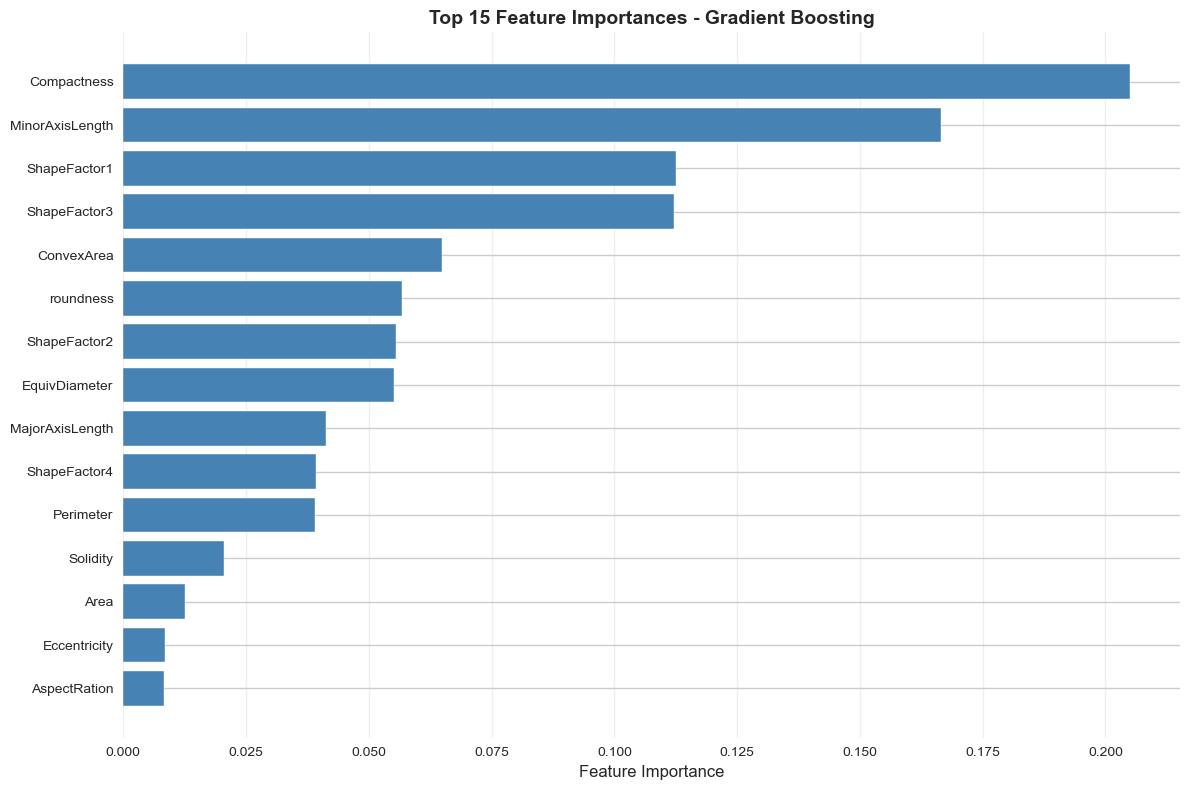

In [70]:

# Test 4: Feature Importance (if available)
print("\n4. FEATURE IMPORTANCE")
print("-" * 100)

if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"  {row['Feature']:<25}: {row['Importance']:.6f}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance plot saved as: feature_importance.png")
    plt.show()
else:
    print("\nFeature importance not available for this model type.")




5. PREDICTION CONFIDENCE ANALYSIS
----------------------------------------------------------------------------------------------------

Confidence Statistics:
  Mean Confidence: 0.9346
  Median Confidence: 0.9907
  Min Confidence: 0.3449
  Max Confidence: 1.0000

Prediction Confidence Distribution:
  0.0 - 0.5:   25 predictions ( 0.92%)
  0.5 - 0.7:  184 predictions ( 6.76%)
  0.7 - 0.9:  315 predictions (11.57%)
  0.9 - 1.0: 2197 predictions (80.68%)

High Confidence (≥0.9) Predictions:
  Total: 2199
  Correct: 2154
  Accuracy: 97.95%

✓ Confidence analysis plot saved as: confidence_analysis.png


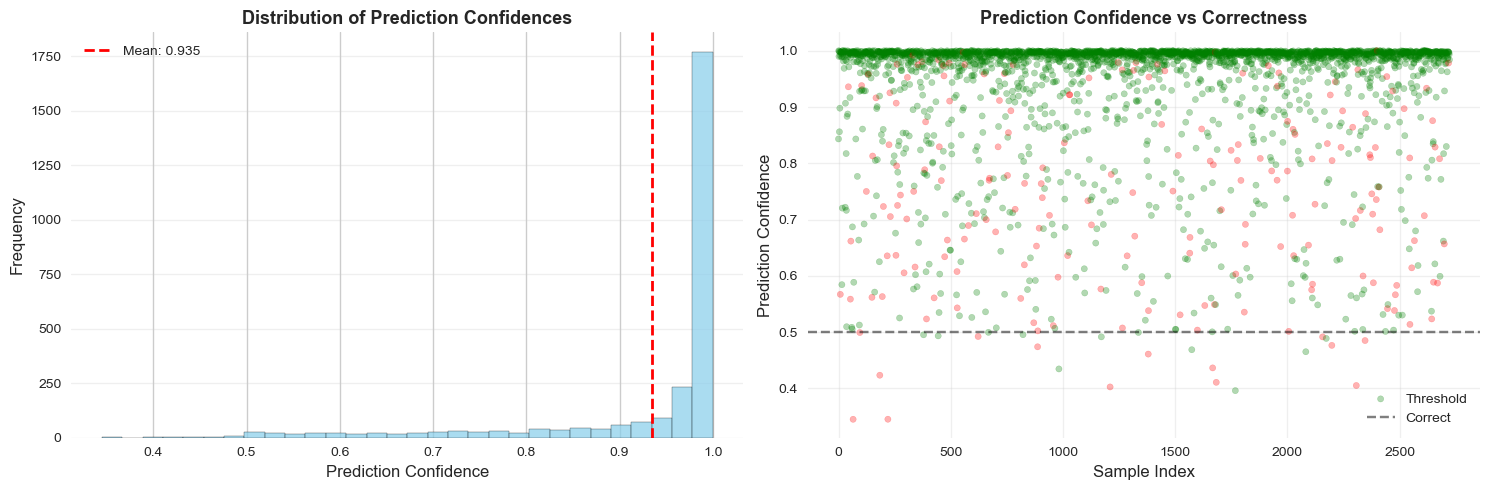

In [73]:

# Test 5: Prediction Confidence Analysis
print("\n5. PREDICTION CONFIDENCE ANALYSIS")
print("-" * 100)

if y_pred_proba is not None:
    confidences = y_pred_proba.max(axis=1)
    
    print(f"\nConfidence Statistics:")
    print(f"  Mean Confidence: {confidences.mean():.4f}")
    print(f"  Median Confidence: {np.median(confidences):.4f}")
    print(f"  Min Confidence: {confidences.min():.4f}")
    print(f"  Max Confidence: {confidences.max():.4f}")
    
    # Confidence ranges
    ranges = [(0.0, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.0)]
    print("\nPrediction Confidence Distribution:")
    for low, high in ranges:
        count = ((confidences >= low) & (confidences < high)).sum()
        pct = (count / len(confidences)) * 100
        print(f"  {low:.1f} - {high:.1f}: {count:4d} predictions ({pct:5.2f}%)")
    
    # High confidence correct vs incorrect
    high_conf_threshold = 0.9
    high_conf_mask = confidences >= high_conf_threshold
    high_conf_correct = (y_pred_test[high_conf_mask] == y_test[high_conf_mask]).sum()
    high_conf_total = high_conf_mask.sum()
    
    if high_conf_total > 0:
        print(f"\nHigh Confidence (≥{high_conf_threshold}) Predictions:")
        print(f"  Total: {high_conf_total}")
        print(f"  Correct: {high_conf_correct}")
        print(f"  Accuracy: {(high_conf_correct/high_conf_total)*100:.2f}%")
    
    # Visualize confidence distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].hist(confidences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(confidences.mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {confidences.mean():.3f}')
    axes[0].set_xlabel('Prediction Confidence', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Prediction Confidences', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Confidence vs Correctness
    correct_mask = y_pred_test == y_test
    axes[1].scatter(range(len(confidences)), confidences, 
                   c=['green' if c else 'red' for c in correct_mask],
                   alpha=0.3, s=20)
    axes[1].axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='50% threshold')
    axes[1].set_xlabel('Sample Index', fontsize=12)
    axes[1].set_ylabel('Prediction Confidence', fontsize=12)
    axes[1].set_title('Prediction Confidence vs Correctness', fontsize=13, fontweight='bold')
    axes[1].legend(['Threshold', 'Correct', 'Incorrect'])
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('confidence_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✓ Confidence analysis plot saved as: confidence_analysis.png")
    plt.show()
else:
    print("\nProbability predictions not available for this model type.")



In [76]:

# Test 6: Sample Test Cases
print("\n6. EXAMPLE TEST CASES")
print("-" * 100)

print("\nTesting model with sample data...")

# Get 5 random samples from test set
sample_indices = np.random.choice(len(X_test), size=min(5, len(X_test)), replace=False)

print(f"\n{'Sample':<8} {'Actual Class':<15} {'Predicted Class':<15} {'Confidence':<12} {'Status':<10}")
print("-" * 100)

for idx, sample_idx in enumerate(sample_indices, 1):
    sample = X_test.iloc[sample_idx:sample_idx+1]
    actual = label_encoder.inverse_transform([y_test[sample_idx]])[0]
    
    pred = final_model.predict(sample)[0]
    predicted = label_encoder.inverse_transform([pred])[0]
    
    if y_pred_proba is not None:
        proba = final_model.predict_proba(sample)[0]
        confidence = proba.max() * 100
    else:
        confidence = 0
    
    status = "Correct" if actual == predicted else "Wrong"
    
    print(f"{idx:<8} {actual:<15} {predicted:<15} {confidence:>10.2f}%  {status:<10}")




6. EXAMPLE TEST CASES
----------------------------------------------------------------------------------------------------

Testing model with sample data...

Sample   Actual Class    Predicted Class Confidence   Status    
----------------------------------------------------------------------------------------------------
1        HOROZ           HOROZ                99.79%  Correct   
2        BARBUNYA        BARBUNYA             91.68%  Correct   
3        SEKER           SEKER                99.71%  Correct   
4        SIRA            SIRA                 99.45%  Correct   
5        CALI            CALI                 99.69%  Correct   


In [78]:

# Test 7: Model Performance Summary
print("\n7. FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 100)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred_test, average=None, zero_division=0
)

print(f"\n{'Class':<15} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-" * 100)

for i, class_name in enumerate(class_names):
    print(f"{class_name:<15} {precision[i]:>10.4f}  {recall[i]:>10.4f}  {f1[i]:>10.4f}  {support[i]:>8}")

# Overall metrics
overall_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
overall_recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
overall_f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

print("-" * 100)
print(f"{'OVERALL':<15} {overall_precision:>10.4f}  {overall_recall:>10.4f}  {overall_f1:>10.4f}  {len(y_test):>8}")
print("=" * 100)

print("\nMODEL TESTING COMPLETED SUCCESSFULLY!")
print("=" * 100)




7. FINAL MODEL PERFORMANCE SUMMARY

Class           Precision    Recall       F1-Score     Support   
----------------------------------------------------------------------------------------------------
BARBUNYA            0.9455      0.9170      0.9310       265
BOMBAY              1.0000      1.0000      1.0000       104
CALI                0.9474      0.9387      0.9430       326
DERMASON            0.9211      0.9224      0.9218       709
HOROZ               0.9605      0.9456      0.9530       386
SEKER               0.9400      0.9655      0.9526       406
SIRA                0.8684      0.8767      0.8725       527
----------------------------------------------------------------------------------------------------
OVERALL             0.9279      0.9277      0.9277      2723

MODEL TESTING COMPLETED SUCCESSFULLY!


In [79]:

# Test 8: Create Test Report
print("\n8. GENERATING TEST REPORT")
print("-" * 100)

test_report = {
    'model_name': best_model_name,
    'test_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'test_samples': len(y_test),
    'accuracy': float(final_accuracy),
    'precision': float(overall_precision),
    'recall': float(overall_recall),
    'f1_score': float(overall_f1),
    'misclassifications': int(len(misclassified_indices)),
    'per_class_metrics': {
        class_names[i]: {
            'precision': float(precision[i]),
            'recall': float(recall[i]),
            'f1_score': float(f1[i]),
            'support': int(support[i])
        }
        for i in range(len(class_names))
    }
}

if y_pred_proba is not None:
    test_report['confidence_stats'] = {
        'mean': float(confidences.mean()),
        'median': float(np.median(confidences)),
        'min': float(confidences.min()),
        'max': float(confidences.max())
    }

with open('test_report.json', 'w') as f:
    json.dump(test_report, f, indent=4)

print("✓ Test report saved as: test_report.json")

print("\n" + "=" * 100)
print("ALL TESTING AND DEPLOYMENT PREPARATION COMPLETED!")
print("=" * 100)

print("\nFiles generated:")
print("  1. best_bean_classifier_model.pkl - Trained model")
print("  2. model_metadata.json - Model information")
print("  3. test_report.json - Testing results")
print("  4. standard_scaler.pkl - Feature scaler")
print("  5. label_encoder.pkl - Class encoder")
print("  6. feature_importance.png - Feature importance visualization (if applicable)")
print("  7. confidence_analysis.png - Prediction confidence analysis (if applicable)")

print("\nYour model is ready for deployment in Streamlit!")
print("=" * 100)


8. GENERATING TEST REPORT
----------------------------------------------------------------------------------------------------
✓ Test report saved as: test_report.json

ALL TESTING AND DEPLOYMENT PREPARATION COMPLETED!

Files generated:
  1. best_bean_classifier_model.pkl - Trained model
  2. model_metadata.json - Model information
  3. test_report.json - Testing results
  4. standard_scaler.pkl - Feature scaler
  5. label_encoder.pkl - Class encoder
  6. feature_importance.png - Feature importance visualization (if applicable)
  7. confidence_analysis.png - Prediction confidence analysis (if applicable)

Your model is ready for deployment in Streamlit!


### https://beansmulticlass-dm.streamlit.app/